In [1]:
import pandas as pd

file_path = '/Users/bhavneetkaur/Documents/Practice/Github Projects/DS Projects/Netflix engagement churn analysis/Netflix Engagement Dataset.csv'

In [2]:
df = pd.read_csv(file_path)
print(df)  

      Customer ID  Subscription Length (Months)  \
0               1                            50   
1               2                            40   
2               3                            17   
3               4                            59   
4               5                             5   
...           ...                           ...   
3495         3496                            20   
3496         3497                            56   
3497         3498                            52   
3498         3499                            34   
3499         3500                             6   

      Customer Satisfaction Score (1-10)  Daily Watch Time (Hours)  \
0                                     10                      4.32   
1                                      5                      4.45   
2                                      8                      4.81   
3                                     10                      2.67   
4                                    

In [3]:
print(df.head())

   Customer ID  Subscription Length (Months)  \
0            1                            50   
1            2                            40   
2            3                            17   
3            4                            59   
4            5                             5   

   Customer Satisfaction Score (1-10)  Daily Watch Time (Hours)  \
0                                  10                      4.32   
1                                   5                      4.45   
2                                   8                      4.81   
3                                  10                      2.67   
4                                   7                      4.20   

   Engagement Rate (1-10) Device Used Most Often Genre Preference  \
0                       8                 Mobile          Romance   
1                       3               Smart TV           Comedy   
2                       8                 Laptop           Sci-fi   
3                      10       

In [4]:
print(df.tail())

      Customer ID  Subscription Length (Months)  \
3495         3496                            20   
3496         3497                            56   
3497         3498                            52   
3498         3499                            34   
3499         3500                             6   

      Customer Satisfaction Score (1-10)  Daily Watch Time (Hours)  \
3495                                   4                      4.82   
3496                                   8                      4.48   
3497                                   7                      4.43   
3498                                   5                      1.11   
3499                                   5                      4.34   

      Engagement Rate (1-10) Device Used Most Often Genre Preference  \
3495                       6                 Laptop           Sci-fi   
3496                       7                 Mobile          Romance   
3497                       8                 Tablet     

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Customer ID                         3500 non-null   int64  
 1   Subscription Length (Months)        3500 non-null   int64  
 2   Customer Satisfaction Score (1-10)  3500 non-null   int64  
 3   Daily Watch Time (Hours)            3500 non-null   float64
 4   Engagement Rate (1-10)              3500 non-null   int64  
 5   Device Used Most Often              3500 non-null   object 
 6   Genre Preference                    3500 non-null   object 
 7   Region                              3500 non-null   object 
 8   Payment History (On-Time/Delayed)   3500 non-null   object 
 9   Subscription Plan                   3500 non-null   object 
 10  Churn Status (Yes/No)               3500 non-null   object 
 11  Support Queries Logged              3500 no

In [6]:
# Step 4: Check for missing/null values in each column
missing_values = df.isnull().sum()

In [7]:
# Step 5: Display missing values
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Customer ID                           0
Subscription Length (Months)          0
Customer Satisfaction Score (1-10)    0
Daily Watch Time (Hours)              0
Engagement Rate (1-10)                0
Device Used Most Often                0
Genre Preference                      0
Region                                0
Payment History (On-Time/Delayed)     0
Subscription Plan                     0
Churn Status (Yes/No)                 0
Support Queries Logged                0
Age                                   0
Monthly Income ($)                    0
Promotional Offers Used               0
Number of Profiles Created            0
dtype: int64


In [8]:
# Step 6: Display rows with missing values
missing_rows = df[df.isnull().any(axis=1)]
print("\nRows with missing values:")
print(missing_rows)


Rows with missing values:
Empty DataFrame
Columns: [Customer ID, Subscription Length (Months), Customer Satisfaction Score (1-10), Daily Watch Time (Hours), Engagement Rate (1-10), Device Used Most Often, Genre Preference, Region, Payment History (On-Time/Delayed), Subscription Plan, Churn Status (Yes/No), Support Queries Logged, Age, Monthly Income ($), Promotional Offers Used, Number of Profiles Created]
Index: []


In [9]:
# Step 7: Display total number of missing values in the dataset
total_missing = df.isnull().sum().sum()
print("\nTotal missing values in dataset:", total_missing)


Total missing values in dataset: 0


In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

import sys

In [11]:
# Data Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Customer ID                         3500 non-null   int64  
 1   Subscription Length (Months)        3500 non-null   int64  
 2   Customer Satisfaction Score (1-10)  3500 non-null   int64  
 3   Daily Watch Time (Hours)            3500 non-null   float64
 4   Engagement Rate (1-10)              3500 non-null   int64  
 5   Device Used Most Often              3500 non-null   object 
 6   Genre Preference                    3500 non-null   object 
 7   Region                              3500 non-null   object 
 8   Payment History (On-Time/Delayed)   3500 non-null   object 
 9   Subscription Plan                   3500 non-null   object 
 10  Churn Status (Yes/No)               3500 non-null   object 
 11  Support Queries Logged              3500 no

In [12]:
df.describe()

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Support Queries Logged,Age,Monthly Income ($),Number of Profiles Created
count,3500.000000,3500.0000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,30.5380,6.929714,3.509451,6.954286,5.023714,43.868286,5491.886857,3.018857
std,1010.507298,17.2591,2.666824,1.441229,2.671427,3.149011,15.323885,2575.005711,1.412875
min,1.000000,1.0000,1.000000,1.000000,1.000000,0.000000,18.000000,1010.000000,1.000000
25%,875.750000,16.0000,5.000000,2.250000,5.000000,2.000000,30.000000,3282.000000,2.000000
50%,1750.500000,31.0000,8.000000,3.510000,8.000000,5.000000,44.000000,5513.000000,3.000000
75%,2625.250000,45.0000,9.000000,4.740000,9.000000,8.000000,57.000000,7729.000000,4.000000
max,3500.000000,60.0000,10.000000,6.000000,10.000000,10.000000,70.000000,9990.000000,5.000000


In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
Customer ID                           0
Subscription Length (Months)          0
Customer Satisfaction Score (1-10)    0
Daily Watch Time (Hours)              0
Engagement Rate (1-10)                0
Device Used Most Often                0
Genre Preference                      0
Region                                0
Payment History (On-Time/Delayed)     0
Subscription Plan                     0
Churn Status (Yes/No)                 0
Support Queries Logged                0
Age                                   0
Monthly Income ($)                    0
Promotional Offers Used               0
Number of Profiles Created            0
dtype: int64


In [14]:
# Depending on the dataset, fill or drop missing values
df = df.dropna()  # For simplicity; in-depth analysis might use imputation

In [15]:
# Map target variable 'Churn Status (Yes/No)' to binary
df['Churn'] = df['Churn Status (Yes/No)'].map({'Yes': 1, 'No': 0})

In [16]:
# Identify categorical columns for potential encoding
categorical_cols = ['Device Used Most Often', 'Genre Preference', 'Region', 
                    'Payment History (On-Time/Delayed)', 'Subscription Plan', 'Promotional Offers Used']

In [17]:
# Convert categorical features to dummy variables (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [18]:
# Final dataframe for modeling; drop the original churn status text column
df_encoded.drop(['Churn Status (Yes/No)'], axis=1, inplace=True)

print('Shape after encoding:', df_encoded.shape)

Shape after encoding: (3500, 26)


In [19]:
# Exploratory Data Analysis (EDA)

## Distribution of Numeric Features
numeric_cols = ['Subscription Length (Months)', 'Customer Satisfaction Score (1-10)', 
                'Daily Watch Time (Hours)', 'Engagement Rate (1-10)', 
                'Support Queries Logged', 'Age', 'Monthly Income ($)', 'Number of Profiles Created']


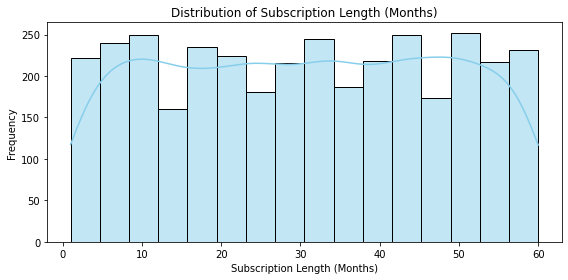

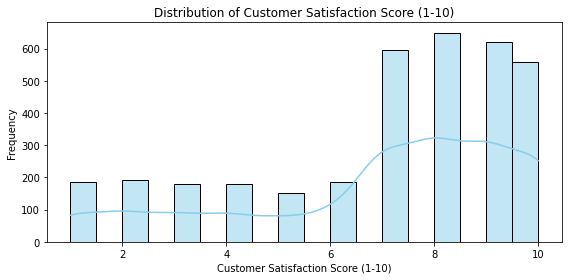

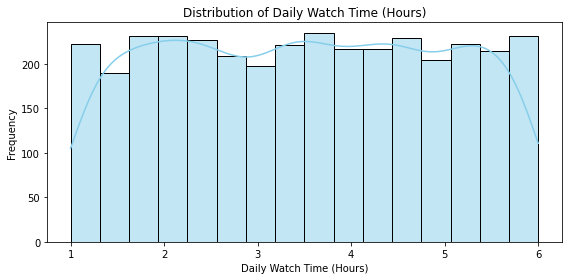

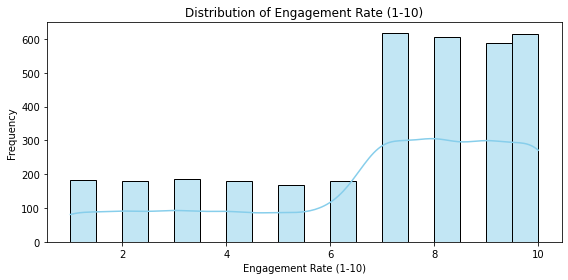

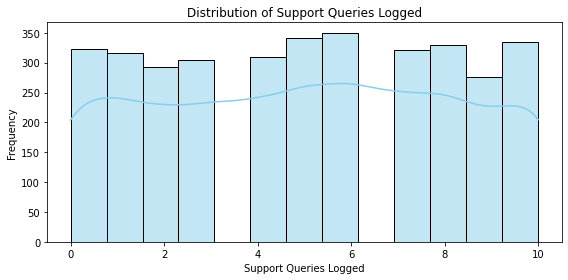

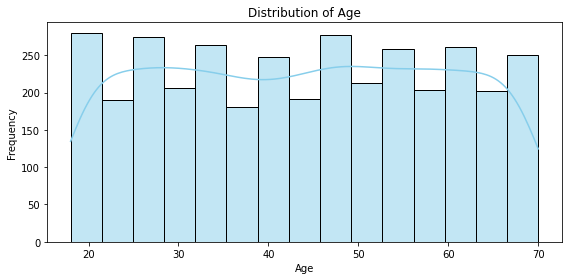

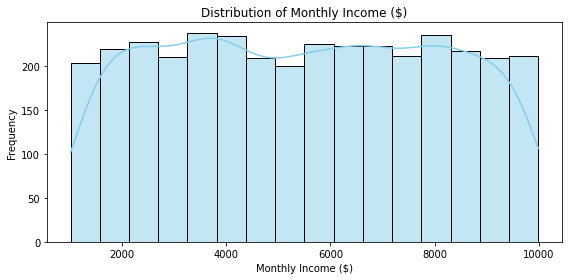

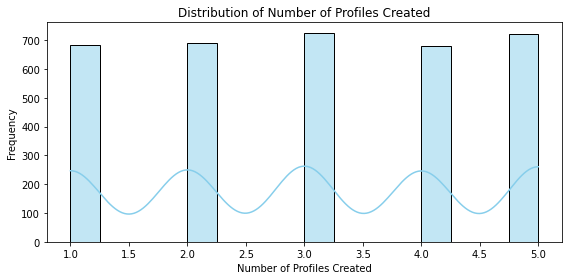

In [20]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

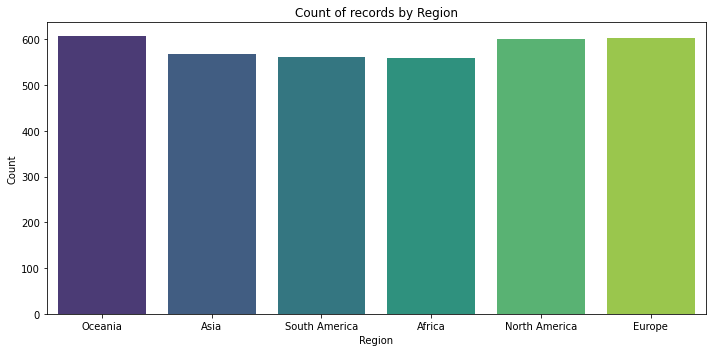

In [21]:
## Count Plot for a Categorical Feature (e.g., Region)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Region', palette='viridis')
plt.title('Count of records by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

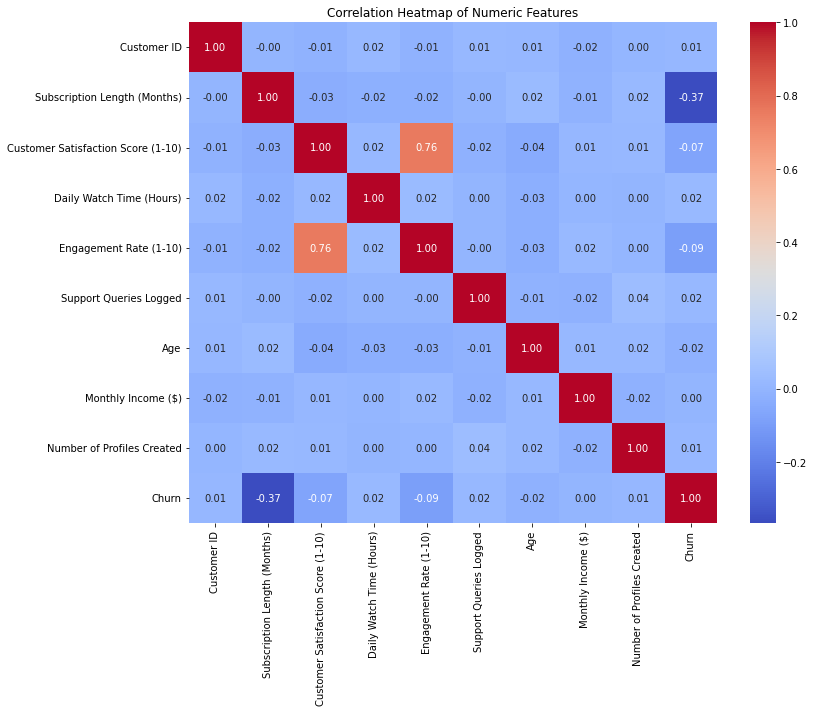

In [22]:
## Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

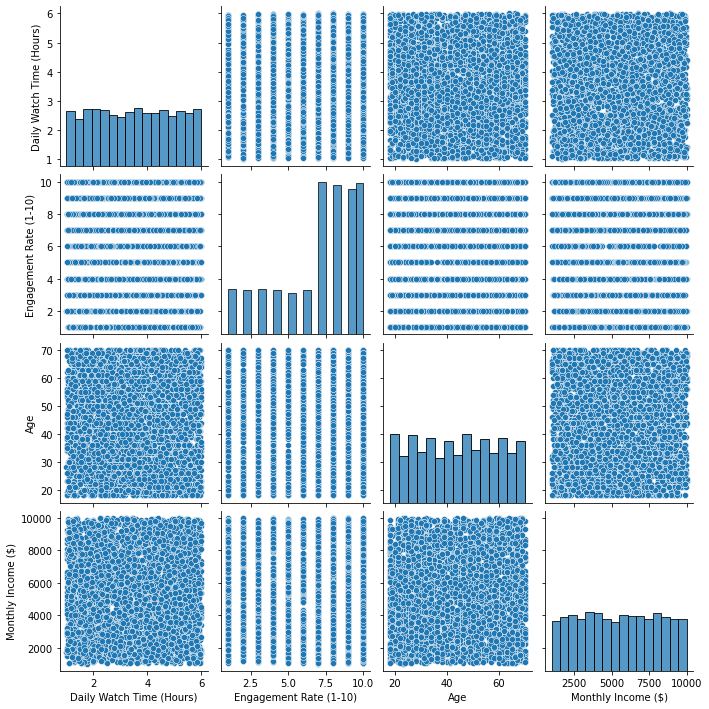

In [23]:
## Pair Plot for a subset of numeric features
subset_cols = ['Daily Watch Time (Hours)', 'Engagement Rate (1-10)', 'Age', 'Monthly Income ($)']
sns.pairplot(df[subset_cols])
plt.show()

In [24]:
# Predictive Modeling: Logistic Regression

## Define features and target
# We use the encoded dataframe for modeling
target = 'Churn'


In [25]:
# Drop columns that are not predictors (Customer ID might be irrelevant for prediction)
drop_cols = ['Customer ID', 'Churn']
X = df_encoded.drop(drop_cols, axis=1)
y = df_encoded[target]


In [26]:
## Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
## Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


/Users/bhavneetkaur/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [28]:
## Generate predictions
y_pred = log_reg.predict(X_test)


In [29]:
## Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy:.2f}')


Accuracy of the Logistic Regression model: 0.95


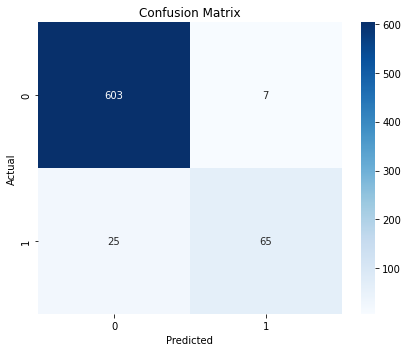

In [30]:
## Confusion Matrix Visualized with a Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

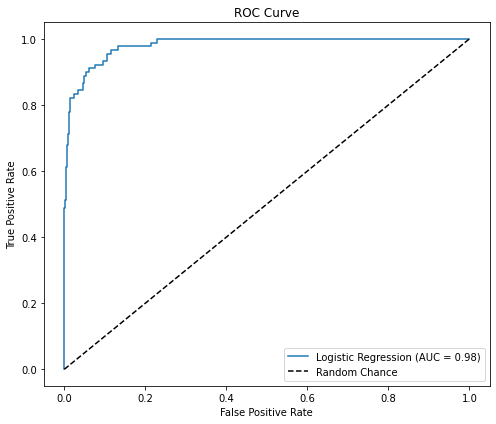

In [31]:
## ROC Curve
y_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

eli5 module not found. Plotting coefficients instead.


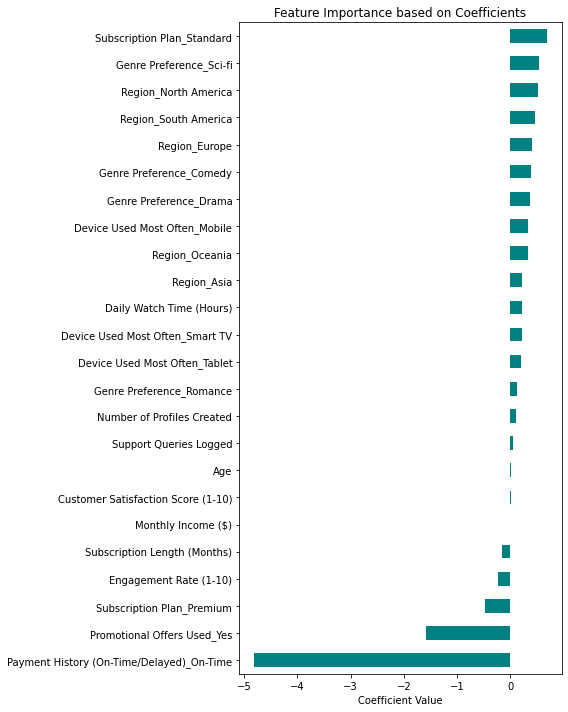

In [32]:
## Permutation Importance Plot or Alternative Coefficient Plot
try:
    import eli5
    from eli5.sklearn import PermutationImportance
    perm_importance = PermutationImportance(log_reg, random_state=42).fit(X_test, y_test)
    # Note: In certain environments (like nbconvert), the display of HTML from eli5 might not work properly.
    # Hence, we print the weights as text if the HTML rendering fails.
    html_obj = eli5.show_weights(perm_importance, feature_names=X_test.columns.tolist())
    from IPython.core.display import display, HTML
    display(HTML(html_obj.data))
except ModuleNotFoundError as e:
    print('eli5 module not found. Plotting coefficients instead.')
    coef = log_reg.coef_[0]
    features_coef = pd.Series(coef, index=X.columns).sort_values()
    plt.figure(figsize=(8,10))
    features_coef.plot(kind='barh', color='teal')
    plt.title('Feature Importance based on Coefficients')
    plt.xlabel('Coefficient Value')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('An error occurred during permutation importance evaluation:', e)
